In [7]:
import glob
import json

perplexities = {}

for file in glob.glob('*/all_results.json'):
    name = file.split("\\")[0]
    try:
        perplexities[name] = json.load(open(file, "r"))['perplexity']
    except:
        continue

In [8]:
perplexities

{'bert-base': 1.0846661749618185,
 'bert-base-0.1': 1.2445919523745683,
 'bert-base-0.5': 4.924881191950635,
 'bert-base-0.9': 274.2968961800083,
 'bert-base-0.95': 1287.7836382791152,
 'bert-base-0.99': 455.64787808104836,
 'gpt2-0.1': 21.63919563079019,
 'gpt2-0.5': 34.73099291258811,
 'gpt2-0.9': 830.69394420909,
 'gpt2-0.95': 1448.0162713867576,
 'gpt2-0.99': 1724.3948796919844,
 'gpt2-base': 21.561401137427417,
 'test-clm-gpt2-base': 21.561401137427417,
 'test-clm-pegasus-0.0-train': 1.002462760907067,
 'xlnet-0.1': 1.0001126690206052,
 'xlnet-0.5': 1.000012105296773,
 'xlnet-0.9': 1.0006170403314985,
 'xlnet-0.95': 1.0077927650582268,
 'xlnet-0.99': 1.5728455052164616,
 'xlnet-base': 1.0000348070552998}

In [25]:
def sort_graphs(p):
    return zip(*sorted(zip(list(p.keys()), list(p.values()))))

In [26]:
bert_perplexities = {float(name.split("-")[-1] if '0' in name else 0): perplexities[name] for name in perplexities if 'bert' in name}
bert_keys, bert_vals = sort_graphs(bert_perplexities)

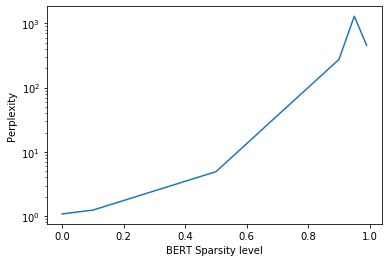

In [27]:
import matplotlib.pyplot as plt
plt.plot(bert_keys, bert_vals)
plt.xlabel("BERT Sparsity level")
plt.ylabel("Perplexity")
plt.yscale('log')

In [28]:
gpt_perplexities = {float(name.split("-")[-1] if '0' in name else 0): perplexities[name] for name in perplexities if 'gpt' in name}
gpt_keys, gpt_vals = sort_graphs(gpt_perplexities)

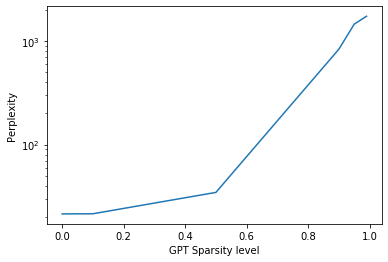

In [29]:
import matplotlib.pyplot as plt
plt.plot(gpt_keys, gpt_vals)
plt.xlabel("GPT Sparsity level")
plt.ylabel("Perplexity")
plt.yscale('log')

In [32]:
runtimes = {}

for file in glob.glob('*/all_results.json'):
    name = file.split("\\")[0]
    try:
        runtimes[name] = json.load(open(file, "r"))['eval_samples_per_second']
    except:
        continue

In [33]:
runtimes

{'bert-base': 115.418,
 'bert-base-0.1': 93.338,
 'bert-base-0.5': 97.856,
 'bert-base-0.9': 113.966,
 'bert-base-0.95': 93.039,
 'bert-base-0.99': 99.348,
 'bert-glue': 568.145,
 'bert-glue-0.1': 529.625,
 'bert-glue-0.5': 569.762,
 'bert-glue-0.9': 567.476,
 'bert-glue-0.95': 529.308,
 'bert-glue-0.99': 609.145,
 'gpt2-0.1': 56.827,
 'gpt2-0.5': 68.735,
 'gpt2-0.9': 69.701,
 'gpt2-0.95': 69.616,
 'gpt2-0.99': 69.702,
 'gpt2-base': 69.735,
 'test-clm-gpt2-base': 53.312,
 'test-clm-pegasus-0.0-train': 36.846,
 'xlnet-0.1': 39.965,
 'xlnet-0.5': 39.2,
 'xlnet-0.9': 35.825,
 'xlnet-0.95': 47.526,
 'xlnet-0.99': 47.986,
 'xlnet-base': 48.166}

In [34]:
bert_runtimes= {float(name.split("-")[-1] if '0' in name else 0): runtimes[name] for name in runtimes if 'bert' in name}
bert_run_keys, bert_run_vals = sort_graphs(bert_runtimes)

Text(0, 0.5, 'Runtime (Evals per')

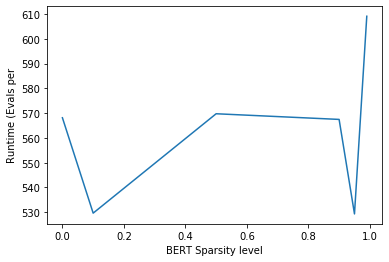

In [36]:
import matplotlib.pyplot as plt
plt.plot(bert_run_keys, bert_run_vals)
plt.xlabel("BERT Sparsity level")
plt.ylabel("Runtime (Evals per second)")

In [37]:
gpt_runtimes= {float(name.split("-")[-1] if '0' in name else 0): runtimes[name] for name in runtimes if 'gpt' in name}
gpt_run_keys, gpt_run_vals = sort_graphs(gpt_runtimes)

Text(0, 0.5, 'Runtime (Evals per second)')

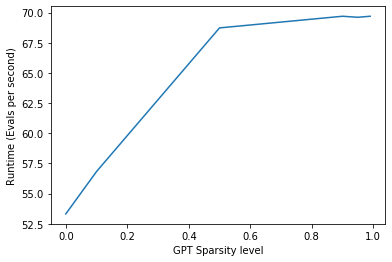

In [38]:
import matplotlib.pyplot as plt
plt.plot(gpt_run_keys, gpt_run_vals)
plt.xlabel("GPT Sparsity level")
plt.ylabel("Runtime (Evals per second)")

In [39]:
model_sizes = json.load(open("./model_sizes.json", "r"))

In [40]:
model_sizes

{'bert.0.1': 1334444913,
 'bert.0.5': 1334444913,
 'bert.0.9': 1334444913,
 'bert.0.95': 1334444913,
 'bert.0.99': 1334444913,
 'bert.base': 1334444913,
 'gpt2.0.1': 510391913,
 'gpt2.0.5': 510391913,
 'gpt2.0.9': 510391913,
 'gpt2.0.95': 510391913,
 'gpt2.0.99': 510391913,
 'gpt2.base': 510391913}

In [42]:
bert_sizes= {0.01 * float(name.split(".")[-1] if '0' in name else 0): model_sizes[name] for name in model_sizes if 'bert' in name}
bert_size_keys, bert_size_vals = sort_graphs(bert_sizes)

Text(0, 0.5, 'Size of Model on Disk')

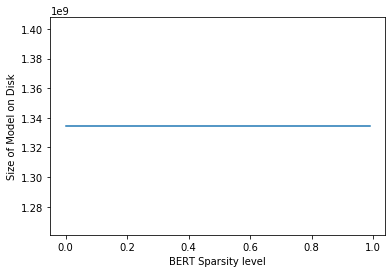

In [46]:
import matplotlib.pyplot as plt
plt.plot(bert_size_keys, bert_size_vals)
plt.xlabel("BERT Sparsity level")
plt.ylabel("Size of Model on Disk")

In [47]:
gpt_sizes= {0.01 * float(name.split(".")[-1] if '0' in name else 0): model_sizes[name] for name in model_sizes if 'gpt' in name}
gpt_size_keys, gpt_size_vals = sort_graphs(gpt_sizes)

Text(0, 0.5, 'Size of Model on Disk')

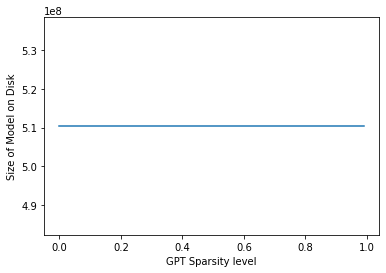

In [48]:
import matplotlib.pyplot as plt
plt.plot(gpt_size_keys, gpt_size_vals)
plt.xlabel("GPT Sparsity level")
plt.ylabel("Size of Model on Disk")